<a href="https://colab.research.google.com/github/Kkhaoshuai/Python-Class-/blob/main/'Class'_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python类的学习

# 一、引入
### 1、以计算圆面积为例

In [ ]:
class Circle(object):
  pi=3.14  #类属性

  def __init__(self,R): #__init__ 前后是两个_!!!
  #(self,R) or (self,r)都可以，调用的时候是根据下面这个self.r=R的，理论上R的位置换成什么都可以
    self.r=R

In [ ]:
circle1=Circle(1)
circle2=Circle(2)
print('——————未修改前——————')
print('pi=\t', Circle.pi)
print('circle1.pi=\t', circle1.pi)
print('circle2.pi=\t', circle2.pi)
print('circle1.r=\t', circle1.r)
print('circle2.r=\t', circle2.r)
print('------通过类名修改后-------')
Circle.pi=3.1415926
print('pi=\t', Circle.pi)
print('circle1.pi=\t', circle1.pi)
print('circle2.pi=\t', circle2.pi)
print('------通过circle1实例修改pi后------')
circle1.pi=3.14111
print('pi=\t', Circle.pi)
print('circle1.pi=\t', circle1.pi)
print('circle2.pi=\t', circle2.pi)
print('------删除circle1的pi实例----')
del circle1.pi
print('pi=\t', Circle.pi)
print('circle1.pi=\t', circle1.pi)
print('circle2.pi=\t', circle2.pi)

——————未修改前——————
pi=	 3.1415926
circle1.pi=	 3.1415926
circle2.pi=	 3.1415926
circle1.r=	 1
circle2.r=	 2
------通过类名修改后-------
pi=	 3.1415926
circle1.pi=	 3.1415926
circle2.pi=	 3.1415926
------通过circle1实例修改pi后------
pi=	 3.1415926
circle1.pi=	 3.14111
circle2.pi=	 3.1415926
------删除circle1的pi实例----
pi=	 3.1415926
circle1.pi=	 3.1415926
circle2.pi=	 3.1415926


可见，类属性是不能通过实例修改的，实例修改的只是给自己套上了特殊的与类属性同名的实例属性。

## Python类的实例方法
方法是表明这个类用是来做什么。

在类的内部，使用 def 关键字来定义方法，与一般函数定义不同，**类方法必须第一个参数为 self**, self 代表的是类的实例（即你还未创建类的实例），其他参数和普通函数是完全一样。

如下我们给圆类 Circle 添加求面积的方法 `get_area` ：

In [ ]:
class Circle(object):
  pi=3.14

  def __init__(self,r):
    self.r=r
  
  def get_area(self): #算圆的面积
    #return self.r**2*self.pi #类属性pi会随着实例属性值的改变而改变
    return self.r**2*Circle.pi #类属性pi不会改变

circle1=Circle(4)
print(circle1.get_area())

50.24


# 二、‘class’整体介绍

## 1、什么是class，什么是instance，什么是object？
* Class: 可以理解为一个组装工厂。   
假如我们要生产一个机器人，那我们要先搭个工厂。已经确定：先安装胳膊，再安装头。这样，我们的小破机器人的流水线就搭好了。这个工厂比较智能，胳膊和头的数量都可以调。

In [ ]:
class BuildRobot(object):
  def __init__(self, armcount, headcount):
    self.armcount=armcount
    self.headcount=headcount

所以这里的class，就是搭了一个工厂叫*BuildRobot*。`__init__` 就是告诉这个流水线这个机器人有几个胳膊（`armcount`），有几个脑袋（`headcount`）。  
(先忽略一下这里的self，以后讲。)

这样你的class就搭好了,可是这时的工厂，没有开始生产，也没有任何产出。接下来就要介绍`instance`

* **instance**：可以理解为启动一次工厂生产出的机器人。现在我们用之前搭的工厂生产一个正常一点的机器人，两个胳膊一个脑袋：

In [ ]:
normal_robot=BuildRobot(2,1) #生成一个名为normal的机器人
normal_robot.headcount #检查一下脑袋数

1

In [ ]:
#再造一个不太正常的机器人
weird_robot=BuildRobot(6,3)

normal_robot 和weird_robot 都是instance。他们虽然胳膊数量不一样，但是本质上都是由这个class造出来的，由胳膊和头组成的机器人。

 **object**： 大部分情况下，object和instance的含义是一样的，都是指这个造出来的robot。这两者的区别，只是在*英语语言环境*下的区别：   
> normal_robot is an instance of 'buildrobot'.  
 normal_robot is a 'buildrobot' object    

上面这两个说法是等价的。

## 2、什么是method，什么是function？
两者都由def定义，稍微粗糙一点的理解就是，在class里面的*function*叫**method**。所以，method是和class，instance有关的一种function。

举个例子：

还是上面的工厂，我们现在加装一个车间，负责把胳膊上色：

In [ ]:
class BuildRobot(object):
  def __init__(self, armcount, headcount):
    self.armcount=armcount
    self.headcount=headcount

  def paintarm(self, color):
    print('paint arm:', color)

这个`paintarm`，就是一个method。还是一样，现在这个class没有生产，因此这个method也没有任何实际的产品出来。我们只能先生产出一个instance来：

In [ ]:
colorful_robot = BuildRobot(6,3)
colorful_robot.paintarm('red') #给该机器人的手臂上色

paint arm: red


### Some Tips:
* 如果没有先造一个机器人，这个车间就没有办法给胳膊上色，因此要上色，就必须先造一个机器人出来。所以，method是依赖于instance的。
* 这个车间只能给这个工厂产出的robot的胳膊上色，你从别的工厂拿一个车过来让他上色，他是不干的。因此，method是依赖于class的。只有这个class创建的instance，才能调用这个method。   

假如我把上色这个活，外包了。我就在外面另建了个工厂，专门上色，这就是**function**

In [ ]:
def outsourcing_paint(robot, color):
  print('paint', robot, 'arm:', color)

outsourcing_paint(colorful_robot, 'red')

paint <__main__.BuildRobot object at 0x7f2602b62590> arm: red


这个外包的上色工厂，不管你这个东西是从哪个工厂来的，无论你是个机器人还是机器狗，反正我就拿来，给胳膊上色。

看到这里，应该就明白function和method的区别了。

注意method其实有两种，一种是**instance method**，一种是**class method**。

instance method就相当于对于机器人这个产品进行各种修改的车间。我给机器人上色，不影响我这个工厂的外形对吧？

class method，是对这个工厂，这个class的属性进行修改的车间，比如我有一个车间负责把工厂涂成红色的。这个行为并不影响我造出来的机器人的大小颜色属性。

本篇的讨论，我们先限定在instance method里。

## 3、self

在python里，要想使`instance.method()`这个格式可以正常工作，在class里面编写method的时候，就必须把变量的第一个位子留出来，用来指代未来call这个method的instance。就相当于我们在搭建给胳膊上色的这个车间的时候，就必须预留一个入口来放入已经生产出来的机器人。

留出来的这个位子，可以叫任何名字。只不过为了代码的优美，大部分人选择使用self，来指代使用这个method的instance他自己。

# 总结
## 1.

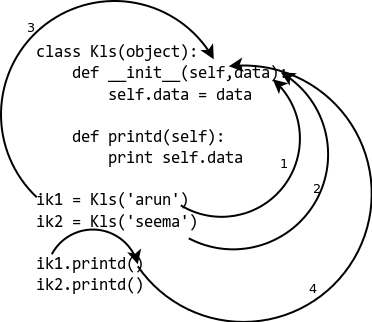

* In 1 and 2, the arguments are passed to the method.  
 (1和2参数传递给__init__方法中的data参数。)
* On 3, the self argument refers to the instance.  
 (3self 参数指向当前实例自身，self代表创建的实例变量 ik1 或者 Kls('arun')。)
* At 4, we do not need to provide the instance to the method, as it is handled by the interpretor itself.

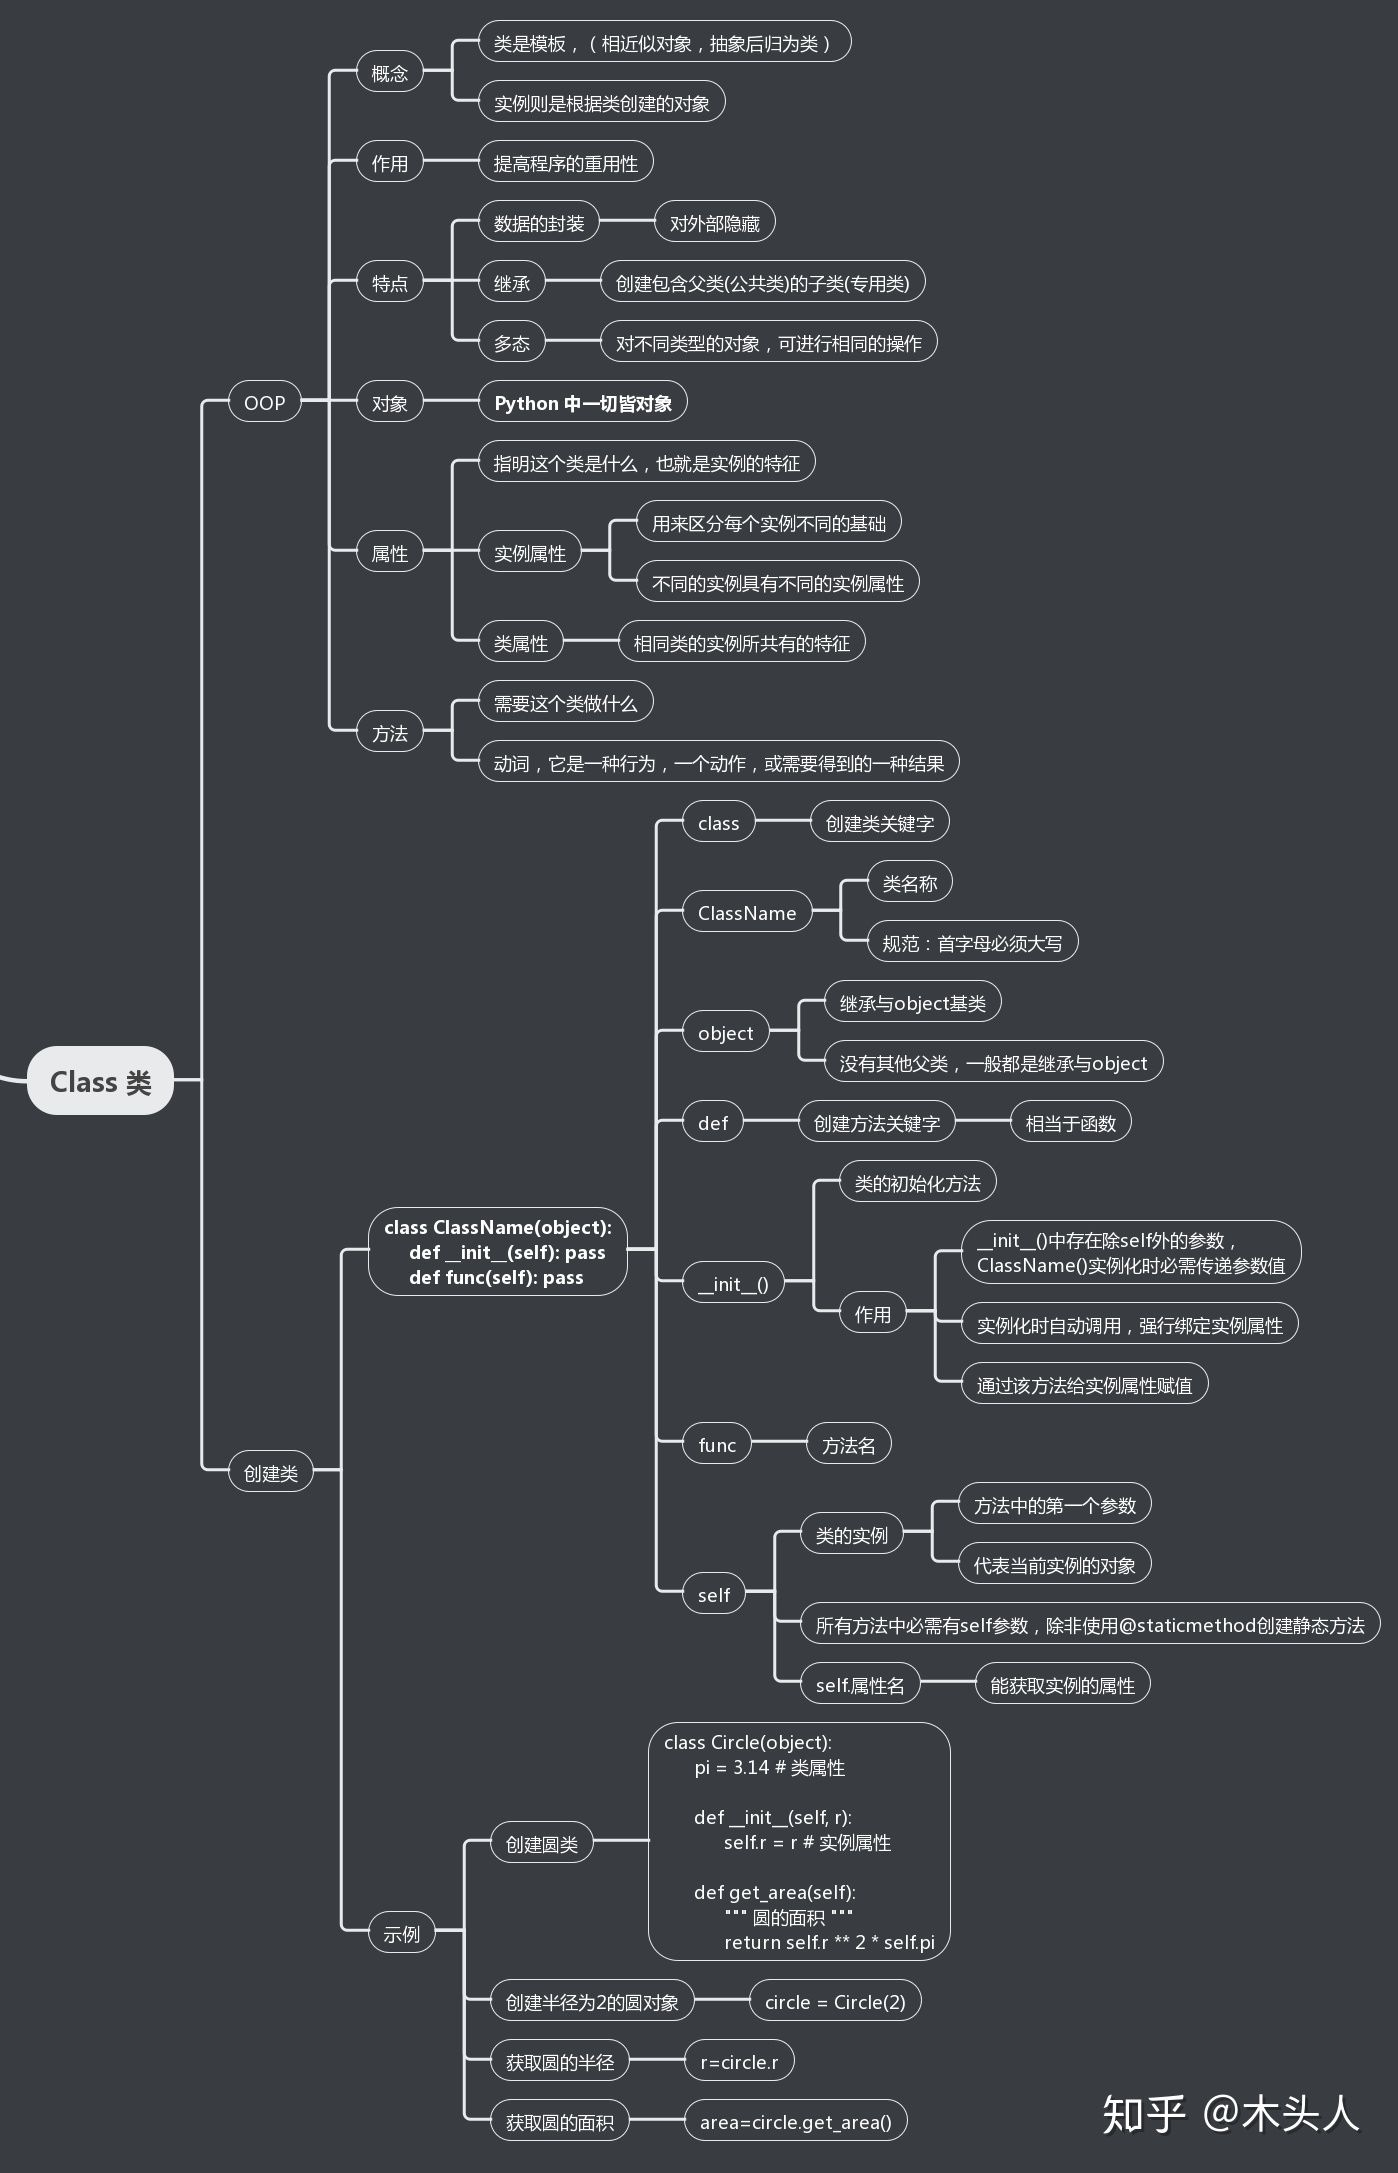

## 2.
* self是在为class编写instance method的时候，放在变量名第一个位子的占位词。
* 在具体编写instance method里，可以不使用self这个变量。
* 如果在method里面要改变instance的属性，可以用self.xxxx来指代这个属性进行修改。

所以**self**简单来说就是指由这个class造出来的instance，即上例所述的‘机器人’。

# References
* https://zhuanlan.zhihu.com/p/30024792
* https://zhuanlan.zhihu.com/p/95788606